# 深入Keras

## 7.1 Keras工作流程
`渐进式呈现复杂性(progressive disclosure of complexity)`

## 7.2 构建Keras模型的不同方法
* 序贯模型 `sequential model`
* 函数式API `function API`
* 模型子类化 `model subclassing`

### 7.2.1 序贯模型

#### [C] 7.1 Sequential 类

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#### [C] 7.2 逐步构建序贯模型

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#### [C] 7.3 尚未完成构建的模型没有权重

``
model.weights
``

*ValueError: Weights for model 'sequential_1' have not yet been created. Weights are created when the model is first called on inputs or `build()` is called with an `input_shape`

#### [C] 7.4 通过第一次调用模型来完成构建

In [3]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.0683395 ,  0.09431973, -0.01083946, -0.01685584, -0.16318913,
          0.04949835, -0.22794226,  0.02725279,  0.04801682, -0.07146323,
          0.22102702, -0.2736076 , -0.00555462,  0.2607662 , -0.19325593,
         -0.2398926 , -0.03134042,  0.20117897,  0.05460811,  0.26351243,
         -0.13517919,  0.05498731,  0.13584393, -0.06632799,  0.25446504,
         -0.19727021,  0.1544759 ,  0.26660496, -0.13026564,  0.22368747,
          0.00626004, -0.10000463,  0.11719245,  0.13005725,  0.06577575,
         -0.00786462,  0.04131159,  0.2933476 ,  0.00174603, -0.20302817,
          0.02733961,  0.04437667,  0.16065836,  0.10372838, -0.15939094,
         -0.03924772, -0.14549531,  0.14332443,  0.26592124, -0.13606076,
          0.19773626, -0.08141227,  0.10468501,  0.11298743, -0.21895513,
         -0.11478516, -0.12029198, -0.08872224,  0.23936957, -0.09413466,
          0.05800626,  0.12656814, -0.17604

#### [C] 7.5 summary() 方法显示模型内容

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### [C] 7.6 利用name参数命名模型和层

In [5]:
model = keras.Sequential(name="TBBT's model")
model.add(layers.Dense(64, activation='relu', name='1st_layer'))
model.add(layers.Dense(10, activation='softmax', name='2nd_layer'))
model.build(input_shape=(None, 3))
model.summary()

Model: "TBBT's model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer (Dense)           (None, 64)                256       
                                                                 
 2nd_layer (Dense)           (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### [C] 7.7 提前声明模型的输入形状

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))  # shape参数是单个样本的形状，而不是批量的形状
model.add(layers.Dense(64, activation='relu'))

#### [C] 7.8 使用summary()跟踪模型输出形状的变化

In [7]:
model.summary()

model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7.2.2 函数式API

#### 1 简单示例

##### [C] 7.9 带有两个Dense层的简单函数式模型

In [8]:
# 声明一个Input. inputs对象保存了模型将处理的数据形状和数据类型信息
# 每个样本的形状为(3, )  <--  inputs.shape
# 数据类型 <-- inputs.dtype
inputs   = keras.Input(shape=(3,), name='my_input')
# 创建了一个层，并在输入上调用该层
features = layers.Dense(64, activation='relu')(inputs)

outputs  = layers.Dense(10, activation='softmax')(features)
model    = keras.Model(inputs=inputs, outputs=outputs)

#### 2 多输入、多输出的模型

##### [C] 7.10 多输入、多输出的函数式模型

In [9]:
vocabulary_size = 10000
num_tags        = 100
num_departments = 4

# 定义模型输入
title     = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags      = keras.Input(shape=(num_tags)        , name='tags')

# 通过拼接将输入特征组合成张量 features
features = layers.Concatenate()([title, text_body, tags])
# 利用中间层, 将输入特征重组为更加丰富的表示
features = layers.Dense(64, activation='relu')(features)

# 定义模型输出
priority   = layers.Dense(1              , activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

# 通过指定输入和输出来创建模型
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [10]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

#### 3 训练一个多输入、多输出模型

##### [C] 7.11 通过给定输入和目标组成的列表来训练模型

In [11]:
import numpy as np

num_samples = 1280

# 虚构的输入数据
title_data     = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data      = np.random.randint(0, 2, size=(num_samples, num_tags))

# 虚构的目标数据
priority_data   = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 5ms/step


In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

##### [C] 7.12 通过给定输入和目标组成的字典来训练模型

In [13]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


#### 4 函数式API的强大之处：获取层的连接方式

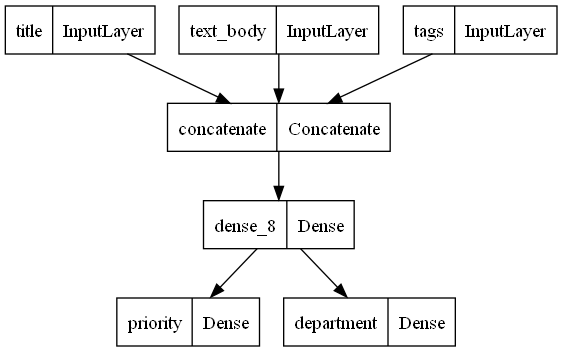

In [14]:
keras.utils.plot_model(model, 'ticket_classifier.png')

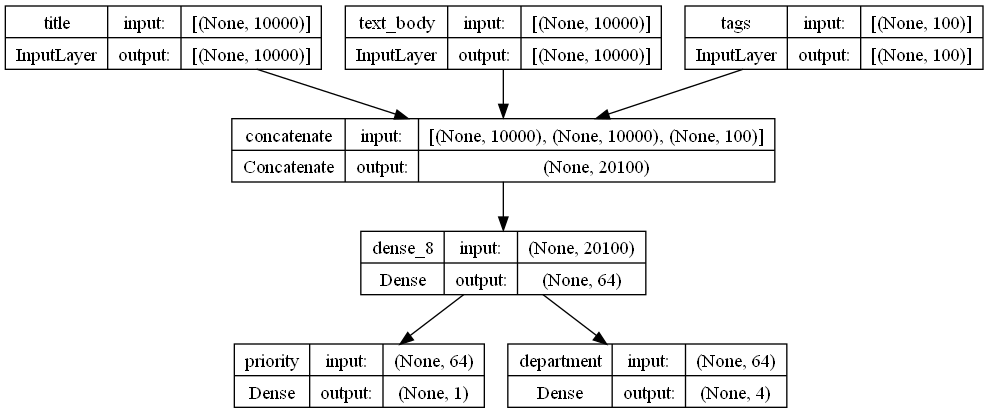

In [15]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

##### [C] 7.13 检索函数式模型某一层的输入或输出

In [16]:
model.layers

In [17]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [18]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

##### [C] 7.14 重复使用中间层的输出, 创建一个新模型

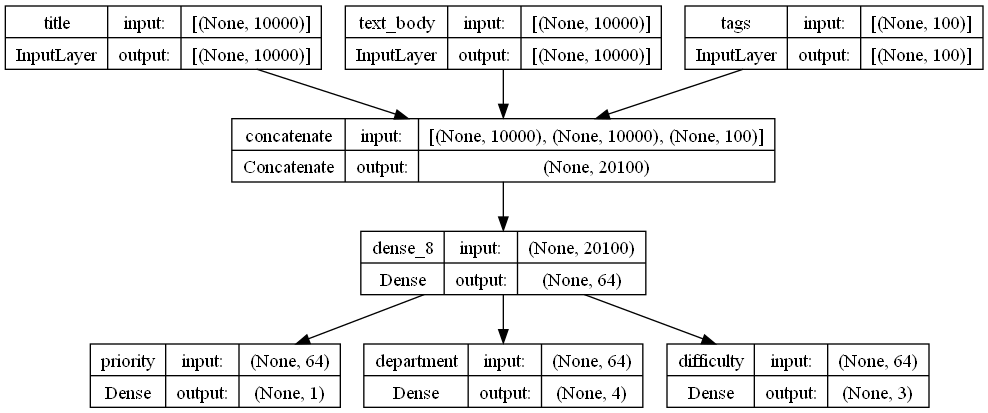

In [19]:
# layers[4]是中间的Dense层
features   = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department, difficulty])

keras.utils.plot_model(new_model, 'updated_ticket_classifier.png', show_shapes=True)

### 7.2.3 模型子类化

#### 1 将前一个例子重新实现为Model子类

##### [C] 7.15 简单的子类化模型

In [20]:
class CustomerTickerModel(keras.Model):

    def __init__(self, num_departments):
        # 构造函数
        super().__init__()

        # 在构造函数中定义子层
        self.concat_layer          = layers.Concatenate()
        self.mixing_layer          = layers.Dense(64, activation='relu')
        self.priority_scorer       = layers.Dense(1 , activation='sigmoid')
        self.department_classifier = layers.Dense(num_departments, activation='softmax')

    def call(self, inputs):
        # 定义前向传播
        title     = inputs['title']
        text_body = inputs['text_body']
        tags      = inputs['tags']

        features   = self.concat_layer([title, text_body, tags])
        features   = self.mixing_layer(features)
        priority   = self.priority_scorer(features)
        department = self.department_classifier(features)

        return priority, department

# 模型实例化
model = CustomerTickerModel(num_departments=4)

priority, department = model({'title':title_data, 'text_body':text_body_data, 'tags':tags_data})



In [21]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 4ms/step


### 7.2.4 混合使用不同的组件

#### [C] 7.16 创建一个包含子类化模型的函数式模型

In [22]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs   = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs  = Classifier(num_classes=10)(features)
model    = keras.Model(inputs=inputs, outputs=outputs)

#### [C] 7.17 创建一个包含函数式模型的子类化模型

In [23]:
inputs  = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation='relu')
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)

        return self.classifier(features)

# 实例化
model = MyModel()

In [24]:
model.build(input_shape=(None, 3))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            multiple                  256       
                                                                 
 model_4 (Functional)        (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### 7.2.5 用正确的工具完成工作

## 7.3 使用内置的训练循环和评估循环

### [C] 7.18 标准工作流程: **`compile()`**, **`fit()`**, **`evaluate()`**, **`predict()`**

In [25]:
from tensorflow.keras.datasets import mnist

# 创建模型
def get_mnist_model():
    inputs   = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs  = layers.Dense(10, activation='softmax')(features)
    model    = keras.Model(inputs, outputs)

    return model

# 加载数据
(images, labels), (test_images, test_labels) = mnist.load_data()

images      = images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

# 实例化
model = get_mnist_model()

# 编译模型. 指定模型的优化器，最小损失函数，监控指标
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(train_images, train_labels, 
          epochs=3,
          validation_data=(val_images, val_labels)
         )

# 使用evaluate()计算模型在新数据上的损失和指标
test_metrics = model.evaluate(test_images, test_labels)

# 使用predict()计算模型在新数据上的分类概率
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2937 - accuracy: 0.9109 - val_loss: 0.1424 - val_accuracy: 0.9583
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1588 - accuracy: 0.9538 - val_loss: 0.1173 - val_accuracy: 0.9685
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


### 7.3.1 编写自定义指标
**Keras指标是`keras.metrics.Metric类的子类`**

#### [C] 7.19 通过Metric类子类化来实现自定义指标. 基于`衡量均方根误差(RMSE)`

In [26]:
import tensorflow as tf

# 自定义RMSE
class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)

        self.mse_sum       = self.add_weight(name='mse_sum'     , initializer='zeros')
        self.total_samples = self.add_weight(name='total_sample', initializer='zeros', dtype='int32')

    # 实现状态更新的逻辑
    def update_state(self, y_true, y_pred, sample_weight=None):
        # y_true参数是一个数据批量对应的目标或标签
        # y_pred表示相应的模型预测值
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        self.total_samples.assign_add(num_samples)
        
    # 返回指标的当前值
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    # 重置指标状态
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)


In [27]:
model = get_mnist_model()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy', RootMeanSquaredError()])

model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels)
         )

test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2944 - accuracy: 0.9121 - rmse: 1.1349 - val_loss: 0.1377 - val_accuracy: 0.9605 - val_rmse: 1.1635
Epoch 2/3
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1572 - accuracy: 0.9534 - rmse: 1.1624 - val_loss: 0.1050 - val_accuracy: 0.9684 - val_rmse: 1.1685
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9705 - rmse: 1.1745


### 7.2.3 使用回调函数 using callbacks
* **模型检查点**(`model checkpointing`)：在训练过程中的不同时间点保存模型的当前状态。
* **提前终止**(`early stopping`)：如果验证损失不再改善，则中断训练。
* **在训练过程中动态调节某些参数值**：比如调节优化器的学习率。
* **在训练过程中记录训练指标和验证指标，或者将模型学到的表示可视化**：fit()进度条实际上就是一个回调函数。

#### [C] 7.20 在fit()方法中使用callbacks参数

In [28]:
# 通过fit()的callbacks参数将回调函数传入模型中，该参数接收一个回调函数列表，可以传入任意数量的回调函数。
callbacks_list = [
    # 如果不再改善，则中断训练
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',  # 监控模型的验证精度
        patience=2,              # 如果精度在两轮内都不再改善，则中断训练
    ),
    
    # 在每轮过后保存当前权重
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.keras',  # 模型文件的保存路径
        monitor='val_loss',                # 只有当val_loss改善时，才会覆盖模型文件，这样就可以一直保存训练过程中的最佳模型
        save_best_only=True,
    )
]

model = get_mnist_model()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels)
         )


Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3007 - accuracy: 0.9104 - val_loss: 0.1424 - val_accuracy: 0.9575
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1639 - accuracy: 0.9534 - val_loss: 0.1176 - val_accuracy: 0.9664
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1313 - accuracy: 0.9623 - val_loss: 0.1065 - val_accuracy: 0.9704
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1139 - accuracy: 0.9680 - val_loss: 0.0994 - val_accuracy: 0.9757
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1055 - accuracy: 0.9713 - val_loss: 0.0930 - val_accuracy: 0.9756
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0957 - accuracy: 0.9743 - val_loss: 0.0988 - val_accuracy: 0.9761
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0886 - accuracy: 0.9767 - val_loss: 0.0986 - val_ac

In [29]:
# 手动保存模型
model = keras.models.load_model('checkpoint_path.keras')

### 7.3.3 编写自定义回调函数
* `on_epoch_begin(epoch, logs)`  # 在每轮开始时被调用
* `on_epoch_end(epoch, logs)`    # 在每轮结束时被调用
* `on_batch_begin(batch, logs)`  # 在处理每个批量之前被调用
* `on_batch_end(batch, logs)`    # 在处理每个批量之后被调用
* `on_train_begin(logs)`         # 在训练开始时被调用
* `on_train_end(logs)`           # 在训练结束时被调用

#### [C] 7.21 通过对callback类子类化来创建自定义回调函数

In [30]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs):
        self.per_batch_losses = []
    
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))
    
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label='Training loss for each batch')
        plt.xlabel(f'Batch (epoch{epoch})')
        plt.ylabel('loss')
        plt.legend()
        plt.savefig(f'plot_at_epoch_{epoch}')

        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2969 - accuracy: 0.9114 - val_loss: 0.1464 - val_accuracy: 0.9575
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1594 - accuracy: 0.9540 - val_loss: 0.1252 - val_accuracy: 0.9654
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1314 - accuracy: 0.9628 - val_loss: 0.1068 - val_accuracy: 0.9714
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1124 - accuracy: 0.9681 - val_loss: 0.1047 - val_accuracy: 0.9729
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1029 - accuracy: 0.9721 - val_loss: 0.0939 - val_accuracy: 0.9775
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0940 - accuracy: 0.9750 - val_loss: 0.0895 - val_accuracy: 0.9788
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0862 - accuracy: 0.9766 - val_loss: 0.0890 - val_accur

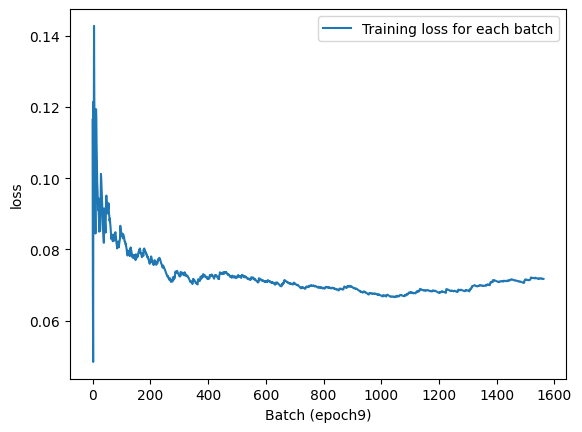

In [31]:
model = get_mnist_model()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels)
         )

### 7.3.4 利用TensorBoard进行监控和可视化

In [32]:
model = get_mnist_model()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tensorboard = keras.callbacks.TensorBoard(log_dir='/full_path_2ur_log_dir',)

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[tensorboard],
          validation_data=(val_images, val_labels)
         )

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2951 - accuracy: 0.9134 - val_loss: 0.1528 - val_accuracy: 0.9549
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1636 - accuracy: 0.9531 - val_loss: 0.1098 - val_accuracy: 0.9692
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1317 - accuracy: 0.9634 - val_loss: 0.1047 - val_accuracy: 0.9715
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1157 - accuracy: 0.9680 - val_loss: 0.1007 - val_accuracy: 0.9735
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1029 - accuracy: 0.9710 - val_loss: 0.0982 - val_accuracy: 0.9744
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0932 - accuracy: 0.9746 - val_loss: 0.1021 - val_accuracy: 0.9763
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0895 - accuracy: 0.9754 - val_loss: 0.0912 - val_ac

## 7.4 编写自定义的训练循环和评估循环

### 7.4.1 训练与推断
* 可训练权重(`trainable weight`)
* 不可训练权重(`non-trainable weight`)

In [33]:
# 监督学习的训练步骤如下
'''
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss        = loss_fn(targets, predictions)
        gradients   = tape.gradients(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(model.trainable_weights, gradients))
'''

'\ndef train_step(inputs, targets):\n    with tf.GradientTape() as tape:\n        predictions = model(inputs, training=True)\n        loss        = loss_fn(targets, predictions)\n        gradients   = tape.gradients(loss, model.trainable_weights)\n        optimizer.apply_gradients(zip(model.trainable_weights, gradients))\n'

### 7.4.2 指标的低价用法

In [34]:
metric  = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

# 对目标和预测值，批量调用update_state(y_true, y_pred)
metric.update_state(targets, predictions)
# 用result()查询当前指标值
current_result = metric.result()

print(f'result:{current_result:.2f}')

result:1.00


In [35]:
values = [0, 1, 2, 3, 4]

# 跟踪某个标量值(比如模型损失)的均值
mean_tracker = keras.metrics.Mean()

for value in values:
    mean_tracker.update_state(value)
    print(f'Mean of value [{value}]:{mean_tracker.result():.2f}')

print(f'Mean of values:{mean_tracker.result():.2f}')

Mean of value [0]:0.00
Mean of value [1]:0.50
Mean of value [2]:1.00
Mean of value [3]:1.50
Mean of value [4]:2.00
Mean of values:2.00


### 7.4.3 完整的训练循环和评估循环

#### [C] 7.22 逐步编写训练循环:训练步骤函数  `a step-by-step training loop`

In [36]:
model = get_mnist_model()

# 准备损失函数
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# 准备优化器
optimizer = keras.optimizers.RMSprop()

# 准备需监控的指标列表
metrics = [keras.metrics.SparseCategoricalAccuracy()]

# 准备Mean指标跟踪器来跟踪损失均值
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):

    with tf.GradientTape() as tape:
        
        # 运行前向传播
        predictions = model(inputs, training=True)
        loss        = loss_fn(targets, predictions)
    
    # 运行反向传播
    gradients   = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    # 跟踪指标
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    
    # 跟踪损失均值
    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()

    # 返回当前的指标和损失值
    return logs


#### [C] 7.23 逐步编写训练循环:重置指标

In [37]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    
    loss_tracking_metric.reset_state()

#### [C] 7.24 逐步编写训练循环:循环本身

In [38]:
# 将NumPy数据转换为一个迭代器
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

# 以大小为32的批量来迭代数据
training_dataset = training_dataset.batch(32)

epochs = 3
for epoch in range(epochs):
    reset_metrics()

    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    
    print(f'Results at the end of epoch {epoch}')

    for key, value in logs.items():
        print(f'...{key}:{value:.4f}')

Results at the end of epoch 0
...sparse_categorical_accuracy:0.9117
...loss:0.2939
Results at the end of epoch 1
...sparse_categorical_accuracy:0.9536
...loss:0.1614
Results at the end of epoch 2
...sparse_categorical_accuracy:0.9632
...loss:0.1310


#### [C] 7.25 逐步编写评估循环

In [39]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)

reset_metrics()

for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)

print("Evaluation results:")

for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9654
...val_loss: 0.1247


### 7.4.4 利用`tf.function`加快运行速度
**将TensorFlow代码编译成计算图，对该计算图进行全局优化**

#### [C] 7.26 为评估步骤函数添加`@tf.function`装饰器(decorator)

In [40]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)

reset_metrics()

for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)

print("Evaluation results:")

for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9654
...val_loss: 0.1247


### 7.4.5 在`fit()`中使用自定义训练循环
* 创建一个新类，它是`keras.Model`的子类。
* 覆盖`train_step(self, data)`方法，它返回一个字典，将指标名称(包括损失)映射到指标当前值。
* 实现`metrics`属性，用于跟踪模型的`Metric`实例。这样模型可以在每轮开始时和调用`evaluate()`时对模型指标自动调用`reset_state()`。

#### [C] 7.27 实现自定义训练步骤，并与`fit()`结合使用

In [41]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()

# 用于跟踪训练过程和评估过程中每批数据的损失均值
loss_tracker = keras.metrics.Mean(name='loss')

class CustomModel(keras.Model):

    # 覆盖train_step()方法
    def train_step(self, data):
        inputs, targets = data

        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)

        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        # 更新损失跟踪指标，该指标用于跟踪损失均值
        loss_tracker.update_state(loss)

        # 通过查询损失跟踪器指标返回当前的损失均值
        return {'loss':loss_tracker.result()}

    @property
    def metrics(self):
        # 需要在不同轮次之间进行重置的指标
        return [loss_tracker]

In [42]:
inputs   = keras.Input(shape=(28 * 28))
features = layers.Dense(512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs  = layers.Dense(10, activation='softmax')(features)

model    = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())

model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2902
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1568
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1300


In [43]:
class CustomModel(keras.Model):

    # 覆盖train_step()方法
    def train_step(self, data):
        inputs, targets = data

        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            # 利用self.compiled_loss计算损失
            loss = self.compiled_loss(targets, predictions)

        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        
        # 通过self.compiled_metrics更新模型指标
        self.compiled_metrics.update_state(targets, predictions)

        # 返回一个字典，将指标名称映射为指标当前值
        return {m.name:m.result() for m in self.metrics}

In [44]:
inputs   = keras.Input(shape=(28 * 28))
features = layers.Dense(512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs  = layers.Dense(10, activation='softmax')(features)

model    = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2975 - sparse_categorical_accuracy: 0.9121
Epoch 2/3
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1619 - sparse_categorical_accuracy: 0.9533
Epoch 3/3
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1327 - sparse_categorical_accuracy: 0.9637
